### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

### Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Данные: рейтинг шоколада с www.kaggle.com

https://www.kaggle.com/soroushghaderi/chocolate-bar-2020?select=chocolate.csv

In [2]:
# данные
df_full = pd.read_csv('chocolate.csv')
df_full.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company                           2224 non-null   object 
 3   company_location                  2224 non-null   object 
 4   review_date                       2224 non-null   int64  
 5   country_of_bean_origin            2224 non-null   object 
 6   specific_bean_origin_or_bar_name  2224 non-null   object 
 7   cocoa_percent                     2224 non-null   float64
 8   rating                            2224 non-null   float64
 9   counts_of_ingredients             2224 non-null   int64  
 10  beans                             2224 non-null   object 
 11  cocoa_butter                      2224 non-null   object 
 12  vanill

In [5]:
# столбцов многовато, для этого задания не буду брать часть про вкусы и определенные ингридиенты
df = df_full.iloc[:,2:10]

In [80]:
# но добавлю укрепненный рейтинг из описания датасета
# и технический столбец для pivot, по-другому не смогла сделать подсчет оценок :(
"""
Rating Scale
* 4.0 - 5.0 = Outstanding
* 3.5 - 3.9 = Highly Recommended
* 3.0 - 3.49 = Recommended
* 2.0 - 2.9 = Disappointing
* 1.0 - 1.9 = Unpleasant
"""

def rate(row):
    """функция укрупнения рейтинга"""
    if row['rating'] <= 1.9:
        return 'Unpleasant'
    elif row['rating'] <= 2.9:
        return 'Disappointing'
    elif row['rating'] <= 3.49:
        return 'Recommended'
    elif row['rating'] <= 3.9:
        return 'Highly Recommended'
    else:
        return 'Outstanding'
    
df['class'] = df.apply(rate, axis=1)

df['counter'] = 1

In [53]:
df.head()

,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,class,counter
0,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,Highly Recommended,1
1,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,Highly Recommended,1
2,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,Recommended,1
3,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,Highly Recommended,1
4,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,Highly Recommended,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           2224 non-null   object 
 1   company_location                  2224 non-null   object 
 2   review_date                       2224 non-null   int64  
 3   country_of_bean_origin            2224 non-null   object 
 4   specific_bean_origin_or_bar_name  2224 non-null   object 
 5   cocoa_percent                     2224 non-null   float64
 6   rating                            2224 non-null   float64
 7   counts_of_ingredients             2224 non-null   int64  
 8   class                             2224 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 156.5+ KB


In [18]:
df.describe()

,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000
mean,2013.857914,71.493930,3.198561,3.075989
std,3.582151,5.278253,0.434329,0.929875
min,2006.000000,42.000000,1.000000,1.000000
25%,2011.000000,70.000000,3.000000,2.000000
50%,2014.000000,70.000000,3.250000,3.000000
75%,2016.000000,74.000000,3.500000,4.000000
max,2020.000000,100.000000,4.000000,6.000000


In [20]:
df['class'].value_counts()

Recommended           865
Highly Recommended    754
Disappointing         497
Outstanding           101
Unpleasant              7
Name: class, dtype: int64

## ГРАФИКИ

<AxesSubplot:title={'center':'Rating distribution'}, ylabel='Frequency'>

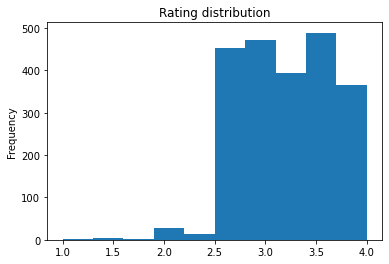

In [21]:
# распределение балльных оценок
df['rating'].plot(kind='hist', 
                   title='Rating distribution',
                   xlabel='Rating',
                   ylabel='Ref')

Распределение балльных оценок:
ближе всего к равномерному + выбросы (низкие оценки).

Смотрим подробнее дальше:

<AxesSubplot:title={'center':'Rating distribution'}>

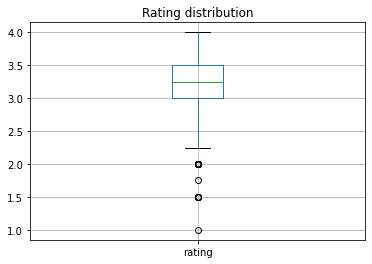

In [22]:
# boxplot
df['rating'].plot(kind='box',
                   title='Rating distribution', grid=True)

In [ ]:
# посмотреть на выбросы (низкие оценки)
df[df['rating'] < 2.25].sort_values('rating')

Основная часть выставляемых оценок - между 3 и 3.5, т.е. Recommended.
Совсем низких оценок (Unpleasant & very Disappointing - т.е. до 2.25) ставится совсем мало, как и совсем высоких - Outstanding. 
Оценок выше 4.0 в данных нет.

Посмотрю, как это выглядит при укрупнении рейтинга (=класса) и как выглядят оценки по годам (также в разрезе класса).

<AxesSubplot:>

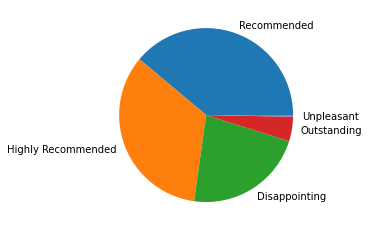

In [79]:
# количество оценок в разрезе укрупненного рейтинга (класса)
number_of_rates_by_class = df['class'].value_counts().sort_values(ascending = False)
number_of_rates_by_class.plot(kind='pie', ylabel='')

<AxesSubplot:xlabel='review_date'>

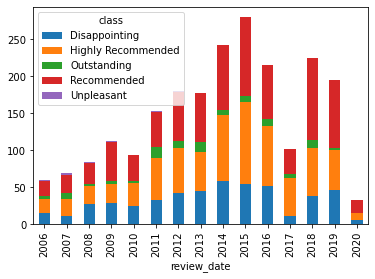

In [74]:
# количество оценок по годам в разрезе укрупненного рейтинга (класса)
ratings_by_years = pd.pivot_table(df, values='counter', index=['review_date'],columns=['class'], aggfunc=np.sum, fill_value=0)

ratings_by_years.plot(kind='bar', stacked=True)

Структура выставляемых оценок по годам не особенно меняется, больше всего Recommended / Highly Recommended.
Из-за чего уменьшается общее количество оценок в 2017 и 2020 годах - неясно. 

Возможные объяснения: 2017 год был неурожайный/ проблемы с поставками сырья для горького шоколада, 2020 - скорее всего еще неполный год.

In [ ]:
#задание еще не закончено, выкладываю так, тк дедалайн